In [1]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head())

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [4]:
df.shape

(1689188, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


In [6]:
df['overall'].value_counts()

5    1009026
4     347041
3     142257
1     108725
2      82139
Name: overall, dtype: int64

In [7]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


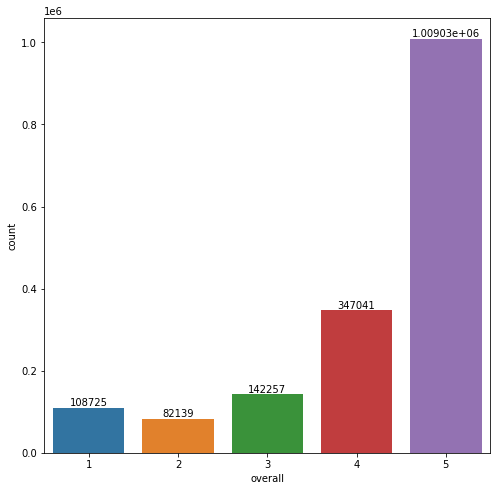

In [8]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df['overall']);
ax.bar_label(ax.containers[0]);

In [9]:
df["reviewText"]=df["reviewText"].str.lower()
#küçük harfe çevirdik (yeni değeri = eski değerini küçük harfe çevir.)
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","") #noktalama işaretlerinin tannımı
#noktalama işaretlerini kaldırdık (yeni değeri = eski değerini noktalama işaretlerini kaldır.)
df["reviewText"]=df["reviewText"].str.replace("\d+","")
#rakamları kaldırdık (yeni değeri = eski değerini rakamları kaldır.)
df["reviewText"]=df["reviewText"].str.replace("\n"," ").replace("\r"," ") #bunun yukardakilerden farkı " " içinde boşluk olmak zorunda
#(yeni değeri = eski değerini Enter ve yeni satır kodlarını kaldırdık)

In [10]:
amazon=df[(df.overall==5) | (df.overall==1)] #1 yıldız verenler ile 5 yıldız verenleri ayırdık

In [11]:
amazon.reset_index(drop=True, inplace=True) #index düzgün sıralamayı yapıyor

In [12]:
amazon

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",we got this gps for my husband who is an otr o...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",im a professional otr truck driver and i bough...,1,Very Disappointed,1290643200,"11 25, 2010"
2,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",ive had mine for a year and heres what we got ...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
3,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",i am using this with a nook hd it works as des...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
4,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",this adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
...,...,...,...,...,...,...,...,...,...
1117746,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""","[1, 1]",burned these in before listening to them for a...,5,Boom -- Pop -- Pow. These deliver.,1405555200,"07 17, 2014"
1117747,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""","[0, 0]",some people like dj style headphones or earbud...,5,"Thin and light, without compromising on sound ...",1405382400,"07 15, 2014"
1117748,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,"[0, 0]",im a big fan of the brainwavz s actually all o...,5,Same form factor and durability as the S1 with...,1405555200,"07 17, 2014"
1117749,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,"[0, 0]",ive used thebrainwavz s in ear headphones and ...,5,Superb audio quality in a very comfortable set...,1405641600,"07 18, 2014"


In [13]:
x=amazon.reviewText
y=amazon.overall

In [14]:
vect=CountVectorizer(lowercase=True,ngram_range=(1,1),stop_words="english") # ingilizce gereksiz kelimeleri kaldırdık
x_yeni=vect.fit_transform(x)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_yeni,y,random_state=42)

In [16]:
print(x) #NLP Projesinde 7 altın kurala uygun olup olmadığını kontrol edip eğitmeye geçiyoruz.

0          we got this gps for my husband who is an otr o...
1          im a professional otr truck driver and i bough...
2          ive had mine for a year and heres what we got ...
3          i am using this with a nook hd it works as des...
4          this adaptor is real easy to setup and use rig...
                                 ...                        
1117746    burned these in before listening to them for a...
1117747    some people like dj style headphones or earbud...
1117748    im a big fan of the brainwavz s actually all o...
1117749    ive used thebrainwavz s in ear headphones and ...
1117750    normally when i receive a review sample i can ...
Name: reviewText, Length: 1117751, dtype: object


In [17]:
print(x_train)

  (0, 308903)	1
  (0, 764568)	2
  (0, 391089)	1
  (0, 800156)	1
  (0, 207710)	1
  (0, 547962)	1
  (0, 850598)	1
  (0, 582899)	1
  (0, 7486)	1
  (0, 100108)	1
  (0, 416387)	1
  (0, 189826)	1
  (0, 121660)	1
  (0, 194301)	1
  (0, 804243)	1
  (0, 306630)	1
  (0, 686597)	1
  (0, 121148)	1
  (0, 375640)	1
  (0, 328800)	1
  (0, 109494)	1
  (0, 376206)	1
  (0, 127284)	2
  (0, 151830)	1
  (0, 566279)	2
  :	:
  (838312, 466477)	1
  (838312, 404986)	1
  (838312, 556576)	1
  (838312, 90555)	1
  (838312, 849663)	1
  (838312, 366253)	1
  (838312, 692056)	1
  (838312, 631879)	1
  (838312, 316362)	1
  (838312, 509757)	1
  (838312, 600725)	1
  (838312, 799329)	1
  (838312, 21934)	1
  (838312, 34730)	1
  (838312, 90490)	1
  (838312, 404444)	1
  (838312, 154917)	1
  (838312, 566279)	1
  (838312, 820927)	1
  (838312, 692149)	1
  (838312, 126004)	1
  (838312, 774181)	1
  (838312, 287514)	1
  (838312, 619548)	1
  (838312, 42779)	1


In [18]:
df.loc[df['overall']==3,"sentiment"]="neutral"
df.loc[df['overall']<3,"sentiment"]="negative"
df.loc[df['overall']>3,"sentiment"]="positive"

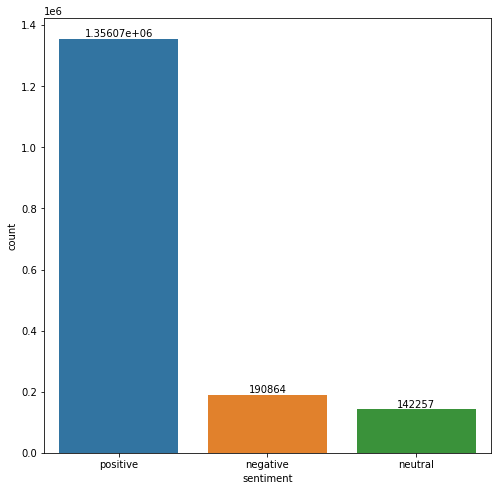

In [19]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["sentiment"]);
ax.bar_label(ax.containers[0]);

In [20]:
x,y=df['reviewText'],df['sentiment']

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
mb=MultinomialNB()

In [23]:
mb.fit(x_train,y_train)

MultinomialNB()

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
tahmin=mb.predict(x_test)

In [26]:
accuracy_score(y_test,tahmin)

0.9361933595287685

In [27]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("Amazon-logo.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [28]:
negative_data=df[df['sentiment']=="negative"]['reviewText']
positive_data=df[df['sentiment']=="positive"]['reviewText']
neutral_data=df[df['sentiment']=="neutral"]['reviewText']

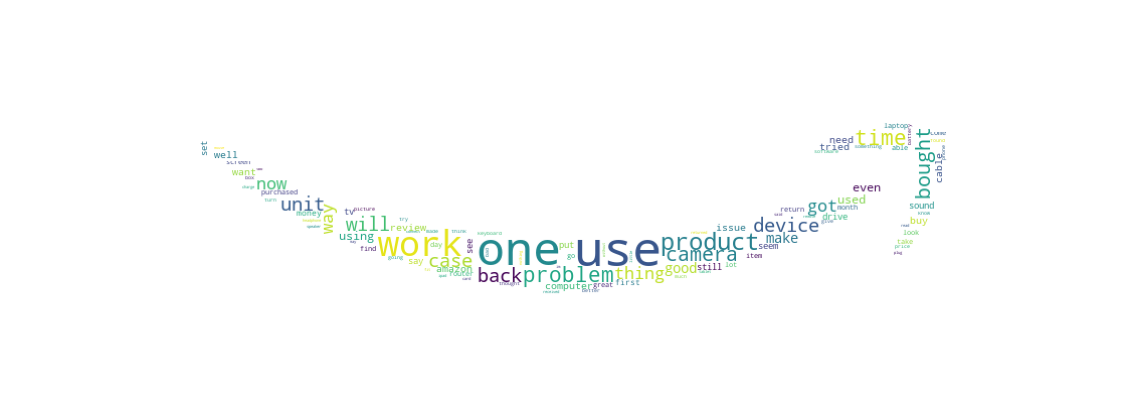

In [29]:
wc(negative_data,'white')

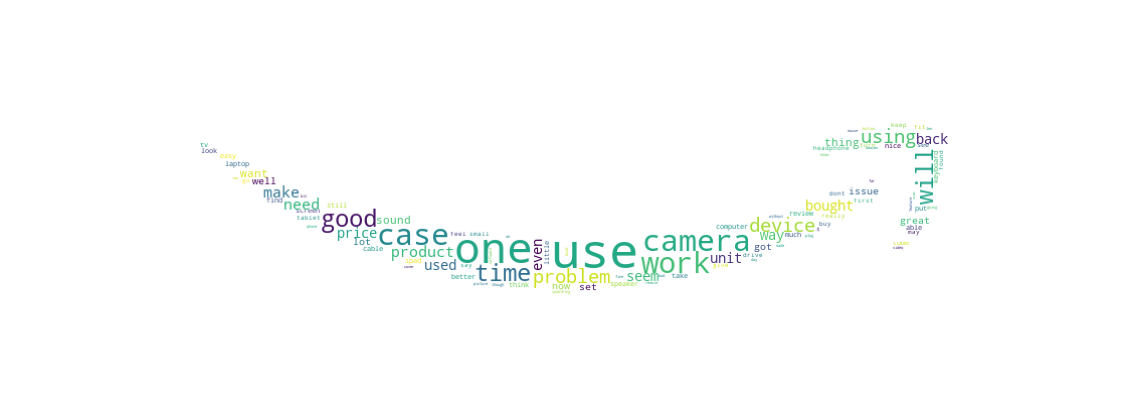

In [30]:
wc(neutral_data,'white')

In [31]:
#wc(positive_data,'white') Çok fazla veri olduğu için colab kaldırmadı. O yüzden olumlu verileri göremedik.

In [32]:
pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import spacy
from spacy import displacy
NER=spacy.load('en_core_web_sm')

In [34]:
for review in df['reviewText'][:1]: 
    print(review)

we got this gps for my husband who is an otr over the road trucker  very impressed with the shipping time it arrived a few days earlier than expected  within a week of use however it started freezing up could of just been a glitch in that unit  worked great when it worked  will work great for the normal person as well but does have the trucker option the big truck routes  tells you when a scale is coming up ect  love the bigger screen the ease of use the ease of putting addresses into memory  nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and thats just my luck  i contacted the seller and within minutes of my email i received a email back with instructions for an exchange very impressed all the way around


In [35]:
raw_text="we got this gps for my husband who is an otr over the road trucker  very impressed with the shipping time it arrived a few days earlier than expected  within a week of use however it started freezing up could of just been a glitch in that unit  worked great when it worked  will work great for the normal person as well but does have the trucker option the big truck routes  tells you when a scale is coming up ect  love the bigger screen the ease of use the ease of putting addresses into memory  nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and thats just my luck  i contacted the seller and within minutes of my email i received a email back with instructions for an exchange very impressed all the way around"

In [36]:
text= NER(raw_text)

In [37]:
displacy.render(text, style = 'ent', jupyter=True)